<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [9]:
# Read CSV
house_csv = "../data/Sacramento_transactions.csv"

AttributeError: 'str' object has no attribute 'head'

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [11]:
# ANSWER
df=pd.read_csv(house_csv)
print(df)

                  street             city    zip state  beds  baths  sq__ft  \
0           3526 HIGH ST       SACRAMENTO  95838    CA     2      1     836   
1            51 OMAHA CT       SACRAMENTO  95823    CA     3      1    1167   
2         2796 BRANCH ST       SACRAMENTO  95815    CA     2      1     796   
3       2805 JANETTE WAY       SACRAMENTO  95815    CA     2      1     852   
4        6001 MCMAHON DR       SACRAMENTO  95824    CA     2      1     797   
..                   ...              ...    ...   ...   ...    ...     ...   
980   9169 GARLINGTON CT       SACRAMENTO  95829    CA     4      3    2280   
981      6932 RUSKUT WAY       SACRAMENTO  95823    CA     3      2    1477   
982    7933 DAFFODIL WAY   CITRUS HEIGHTS  95610    CA     3      2    1216   
983     8304 RED FOX WAY        ELK GROVE  95758    CA     4      2    1685   
984  3882 YELLOWSTONE LN  EL DORADO HILLS  95762    CA     3      2    1362   

            type                     sale_date   pr

#### 2.2 List all possible variables which might be Predictor variable.

In [ ]:
# ANSWER
Beds
Baths
Sq__ft
Type
Latitude
Longitude

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [22]:
# ANSWER


correlation = df.corr()['sq__ft']

print(correlation)


#Sq__Ft - Because beds and baths increase as sq__ft increases

ValueError: could not convert string to float: '3526 HIGH ST'

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [33]:
print(df.columns)

Index(['A', 'B', 'C'], dtype='object')


In [36]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df[['A', 'B', 'C']]
y = df['sq__ft']  # Assuming 'target' is the column you want to predict

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


KeyError: 'sq__ft'

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [37]:
# ANSWER
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv("../data/Sacramento_transactions.csv")

X = df[['A', 'B', 'C']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

absolute_residuals = abs(y_test - y_pred)
print('Absolute Residuals:')
print(absolute_residuals)



KeyError: "None of [Index(['A', 'B', 'C'], dtype='object')] are in the [columns]"

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

Intercept: 3.222151077447231
Slope: 3.9684675107010183


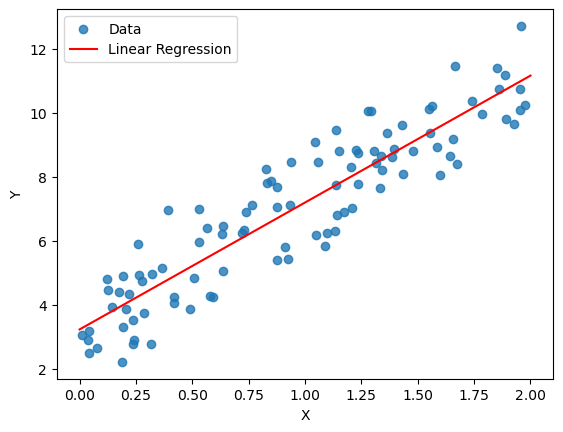

In [38]:
# ANSWER

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 3 + 4 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, Y)

print("Intercept:", model.intercept_[0])
print("Slope:", model.coef_[0][0])

X_new = np.array([[0], [2]])
Y_pred = model.predict(X_new)

plt.scatter(X, Y, alpha=0.8, label='Data')
plt.plot(X_new, Y_pred, 'r-', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

Slope (beta_1) calculated: 3.9684675107010183
Slope (beta_1) from model: 3.9684675107010183


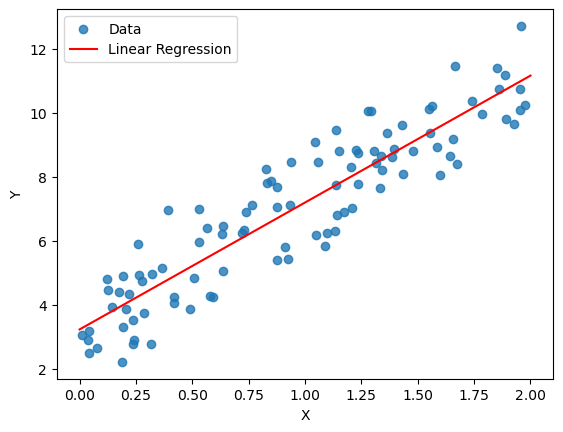

In [39]:
# ANSWER

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 3 + 4 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, Y)

mean_X = np.mean(X)
mean_Y = np.mean(Y)

numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sum((X - mean_X)**2)
beta_1 = numerator / denominator

print("Slope (beta_1) calculated:", beta_1)
print("Slope (beta_1) from model:", model.coef_[0][0])

X_new = np.array([[0], [2]])
Y_pred = model.predict(X_new)

plt.scatter(X, Y, alpha=0.8, label='Data')
plt.plot(X_new, Y_pred, 'r-', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Intercept (beta_0) calculated: 3.222151077447231
Intercept (beta_0) from model: 3.222151077447231


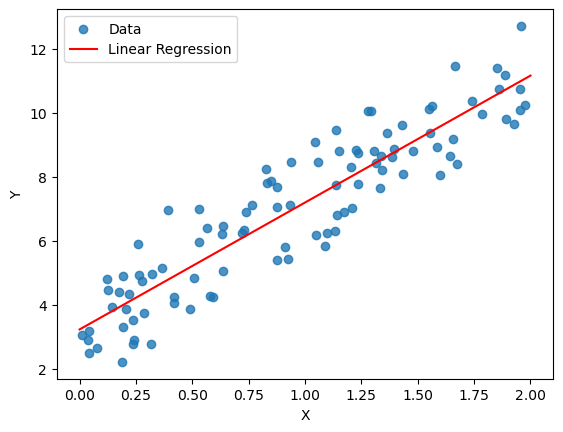

In [40]:
# ANSWER

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 3 + 4 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, Y)

mean_X = np.mean(X)
mean_Y = np.mean(Y)

beta_1 = np.sum((X - mean_X) * (Y - mean_Y)) / np.sum((X - mean_X)**2)
beta_0 = mean_Y - beta_1 * mean_X

print("Intercept (beta_0) calculated:", beta_0)
print("Intercept (beta_0) from model:", model.intercept_[0])

X_new = np.array([[0], [2]])
Y_pred = model.predict(X_new)

plt.scatter(X, Y, alpha=0.8, label='Data')
plt.plot(X_new, Y_pred, 'r-', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)



Intercept (beta_0) calculated: 3.222151077447231
Slope (beta_1) calculated: 3.9684675107010183
Predicted values (Yhat) calculated manually:
[[ 3.22215108]
 [11.1590861 ]]
Predicted values (Yhat) from model:
[[ 3.22215108]
 [11.1590861 ]]


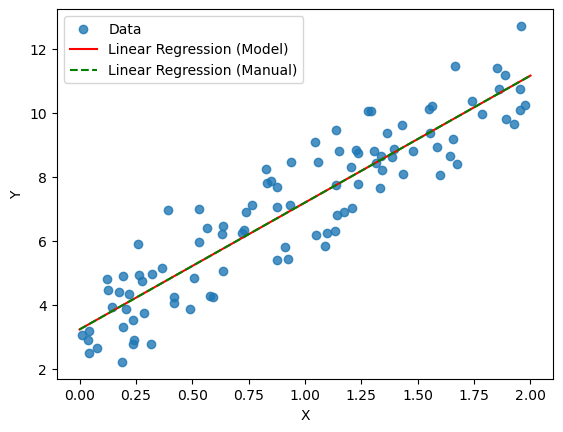

In [41]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 3 + 4 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, Y)

mean_X = np.mean(X)
mean_Y = np.mean(Y)

beta_1 = np.sum((X - mean_X) * (Y - mean_Y)) / np.sum((X - mean_X)**2)
beta_0 = mean_Y - beta_1 * mean_X

print("Intercept (beta_0) calculated:", beta_0)
print("Slope (beta_1) calculated:", beta_1)

X_new = np.array([[0], [2]])
Y_pred_manual = beta_0 + beta_1 * X_new
Y_pred_model = model.predict(X_new)

print("Predicted values (Yhat) calculated manually:")
print(Y_pred_manual)

print("Predicted values (Yhat) from model:")
print(Y_pred_model)

plt.scatter(X, Y, alpha=0.8, label='Data')
plt.plot(X_new, Y_pred_model, 'r-', label='Linear Regression (Model)')
plt.plot(X_new, Y_pred_manual, 'g--', label='Linear Regression (Manual)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### $$\hat{y} = \beta_0 + \beta_1 x$$

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [ ]:
# ANSWER
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 3 + 4 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, Y)

mean_X = np.mean(X)
mean_Y = np.mean(Y)

beta_1 = np.sum((X - mean_X) * (Y - mean_Y)) / np.sum((X - mean_X)**2)
beta_0 = mean_Y - beta_1 * mean_X

X_new = np.array([[0], [2]])
Y_pred_manual = beta_0 + beta_1 * X_new
Y_pred_model = model.predict(X_new)

residuals_manual = Y - (beta_0 + beta_1 * X)
residuals_model = Y - model.predict(X)

print("Residuals calculated manually:")
print(residuals_manual)

print("Residuals from model:")
print(residuals_model)

plt.scatter(X, Y, alpha=0.8, label='Data')
plt.plot(X_new, Y_pred_model, 'r-', label='Linear Regression (Model)')
plt.plot(X_new, Y_pred_manual, 'g--', label='Linear Regression (Manual)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [43]:
# ANSWER
def r_squared(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    explained_variance = np.sum((y_pred - mean_y_true)**2)
    total_variance = np.sum((y_true - mean_y_true)**2)

    r2 = 1 - (explained_variance / total_variance)
    return r2

Y_true = np.array([3, 4, 5, 6, 7])
Y_pred = np.array([2.8, 4.2, 5.3, 6.5, 7.2])

r2_value = r_squared(Y_true, Y_pred)
print("R-squared value:", r2_value)

R-squared value: -0.266


##### 2.7.F [BONUS] Draw Plot of Predicted Line

R-squared value: -4.440892098500626e-16


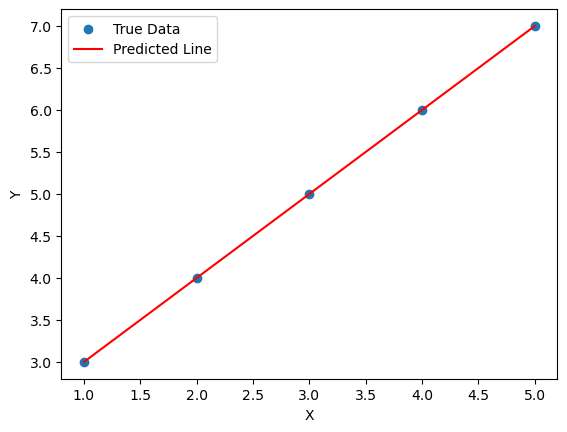

In [45]:
# ANSWER

def r_squared(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    explained_variance = np.sum((y_pred - mean_y_true)**2)
    total_variance = np.sum((y_true - mean_y_true)**2)

    r2 = 1 - (explained_variance / total_variance)
    return r2

X = np.array([[1], [2], [3], [4], [5]])
Y_true = np.array([3, 4, 5, 6, 7])

model = LinearRegression()
model.fit(X, Y_true)

Y_pred = model.predict(X)

r2_value = r_squared(Y_true, Y_pred)
print("R-squared value:", r2_value)


plt.scatter(X, Y_true, label='True Data')
plt.plot(X, Y_pred, 'r-', label='Predicted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [ ]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [ ]:
# ANSWER



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



